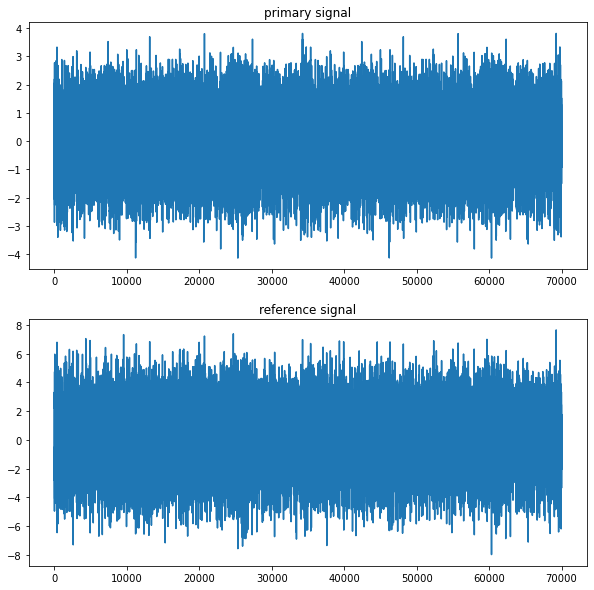

In [2]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write

"load the data"
data = scio.loadmat('project1.mat')
primary = data['primary']
reference = data['reference']
length = primary.shape[1]


x = np.arange(0,length,1)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.title("primary signal")
plt.plot(x,primary[0])


plt.subplot(2,1,2)
plt.title("reference signal")
plt.plot(x,reference[0])

plt.show()

In [4]:
"setting parameter"
order_number = 12
W = np.zeros([order_number,1])
Nu = 0.01
"data preprocessing"

primary_time = np.zeros([length,order_number])

for i in range(length):
    index = i
    for j in range(order_number):
        if index >= 0:
            primary_time[i][j] = primary[0][index]
            index -= 1
        else:
            break


In [19]:
"""execute APA Newton"""

k = 20

mse_cur = np.zeros([1,length])
output = np.zeros([1,length])

for i in range(length):
    U = np.zeros([order_number,k])
    d = np.zeros([k,1])
    index = i
    for j in range(k-1,-1,-1):
        if index>=0 :
            U[:,j] = primary_time[index].T
            d[j][0] = reference[0][index]
            index -= 1
    R = np.dot(U.T,U)
    id = np.identity(k)
    R = R + id*Epsilon
    R_inv = np.linalg.inv(R)
    error = d - np.dot(U.T,W)
    alpha = np.dot(R_inv,error)
    W = W + Nu*np.dot(U,alpha)
    output[0] = (np.dot(primary_time[i,:], W[:,0]).T)
    mse_cur[0][i] = (np.square(output[0][0:i] - reference[0][0:i]).sum())/(i+1)
